# **ARCH TECHNOLOGIES - ML INTERNSHIP**

## **Category B: Intermediate**

## **Brain Tumor Segmentation with YOLO 11 and SAM2**

This project involves using advanced computer vision techniques to perform brain tumor segmentation using YOLO 11 and SAM2 models.

**Overview:**


*   **YOLO 11** - A state-of-the-art real-time object detection model that identifies multiple objects in an image with high speed and accuracy.

*   **SAM2** (Segment Anything Model 2) - A segmentation model designed for precise object separation in an image.
*   **Segmentation** - The process of partitioning an image into meaningful regions to detect and analyze objects.


**Task Requirements**

*   Understand how YOLO 11 and SAM2 work for segmentation tasks.
*   Set up the necessary Python environment for implementation.
*   Train and test the model using a dataset of brain tumor images.
*   Evaluate the segmentation results and fine-tune the model if necessary.
*   Document the implementation process, findings, and observations.


### **Installing & Importing Necessary Libraries**

The Ultralytics library is a powerful, user-friendly Python framework for training, validating, and deploying state-of-the-art YOLO (You Only Look Once) object detection models.

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 78.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 71.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 102.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [2]:
import gdown
import zipfile

In [3]:
import torch
import os

In [4]:
from PIL import Image
import matplotlib.pyplot as plt

In [5]:
import random

In [6]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [7]:
from ultralytics import SAM

### **Mounting Google Drive**

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Downloading Dataset from Google Drive**

In [11]:
# Google Drive file ID and URL
zip_filename = "Tumor Detection - Dataset.zip"
download_url = f"https://drive.google.com/uc?id=1lmK16P3FWMpFSOBrVh0Uk9TfqzPKQOId&export=download"

# Downloading the ZIP file
gdown.download(download_url, zip_filename, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1lmK16P3FWMpFSOBrVh0Uk9TfqzPKQOId&export=download
From (redirected): https://drive.google.com/uc?id=1lmK16P3FWMpFSOBrVh0Uk9TfqzPKQOId&export=download&confirm=t&uuid=6062d6ad-5786-482d-93dc-d5b8d8c35b18
To: /content/Tumor Detection - Dataset.zip
100%|██████████| 72.8M/72.8M [00:02<00:00, 35.0MB/s]


'Tumor Detection - Dataset.zip'

### **Extracting the Dataset**

In [12]:
# Extracting the ZIP file into "Tumor_Dataset" directory
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall("Tumor_Dataset")

### **Checking GPU Availability**

This cell was run to check if GPUs are available or not?

In [13]:
print("CUDA available?", torch.cuda.is_available())
print("Number of GPUs:", torch.cuda.device_count())

CUDA available? True
Number of GPUs: 1


### **Object Detection**

In this section, I loaded a pre-trained model named yolo11n and then trained it on my dataset. This model was loaded to perform object detection on the brain tumor dataset.

  

In [14]:
# Loading a pre-trained model
model = YOLO("yolo11n.pt")

# Training the model
train_results = model.train(
    data="/content/Tumor_Dataset/data.yaml",  # path to YAML dataset
    epochs=20,  # number of training epochs
    imgsz=640,  # training image size
    device="0",  # Using GPU for training
)

100%|██████████| 5.35M/5.35M [00:00<00:00, 98.7MB/s]


Ultralytics 8.3.129 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Tumor_Dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretraine

100%|██████████| 755k/755k [00:00<00:00, 23.3MB/s]

Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

YOLO11n summary: 181 layers, 2,590,815 parameters, 2,590,799 gradients, 6.4 GFLOPs

Transferred 448/499 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1095.6±373.8 MB/s, size: 34.0 KB)


train: Scanning /content/Tumor_Dataset/train/labels... 1370 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1370/1370 [00:00<00:00, 2116.42it/s]

train: /content/Tumor_Dataset/train/images/no_tumor_914_jpg.rf.6714544aee2bde5213fd2c366dff62aa.jpg: 1 duplicate labels removed
train: New cache created: /content/Tumor_Dataset/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1456, len(boxes) = 1461. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 434.2±148.8 MB/s, size: 29.4 KB)


val: Scanning /content/Tumor_Dataset/valid/labels... 395 images, 0 backgrounds, 0 corrupt: 100%|██████████| 395/395 [00:00<00:00, 1047.40it/s]

val: New cache created: /content/Tumor_Dataset/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20       2.4G     0.9377       3.05      1.287         13        640: 100%|██████████| 86/86 [00:28<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.01it/s]

                   all        395        415      0.809      0.237      0.395      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20       2.8G     0.9257      1.941      1.256         16        640: 100%|██████████| 86/86 [00:24<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.49it/s]

                   all        395        415      0.683      0.431      0.434      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.81G     0.9627      1.705      1.295         24        640: 100%|██████████| 86/86 [00:24<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.20it/s]


                   all        395        415      0.827       0.42      0.466      0.315

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.83G     0.9641      1.541      1.291         18        640: 100%|██████████| 86/86 [00:23<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.18it/s]

                   all        395        415       0.82      0.478      0.515      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.85G     0.9276      1.345      1.256         11        640: 100%|██████████| 86/86 [00:23<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.11it/s]


                   all        395        415      0.779      0.428      0.427      0.308

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.86G     0.8845      1.235       1.24         21        640: 100%|██████████| 86/86 [00:23<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.04it/s]

                   all        395        415      0.852      0.505      0.576      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.88G     0.8655      1.106      1.231         15        640: 100%|██████████| 86/86 [00:23<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.06it/s]

                   all        395        415      0.748      0.582      0.578      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.89G     0.8639      1.063      1.234         18        640: 100%|██████████| 86/86 [00:23<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.99it/s]

                   all        395        415      0.715      0.545      0.585      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20       2.9G     0.7992     0.9587      1.171         21        640: 100%|██████████| 86/86 [00:23<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.01it/s]

                   all        395        415      0.794      0.525       0.58      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.92G     0.7977     0.9304      1.189         19        640: 100%|██████████| 86/86 [00:23<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.85it/s]

                   all        395        415      0.767      0.532      0.596      0.456


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.93G     0.7135     0.9618      1.162         10        640: 100%|██████████| 86/86 [00:24<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.11it/s]

                   all        395        415       0.82      0.564      0.604      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.95G     0.6882     0.8592      1.145         11        640: 100%|██████████| 86/86 [00:22<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.89it/s]

                   all        395        415      0.838       0.55      0.609      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.96G     0.6732     0.8115      1.125         10        640: 100%|██████████| 86/86 [00:22<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.20it/s]


                   all        395        415       0.78      0.602      0.603      0.478

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.98G     0.6299     0.7347      1.094         11        640: 100%|██████████| 86/86 [00:22<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.37it/s]

                   all        395        415      0.833      0.612      0.632      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.99G     0.6148     0.7048      1.075         11        640: 100%|██████████| 86/86 [00:22<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.10it/s]

                   all        395        415      0.852      0.591      0.616      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      3.01G     0.5964       0.67      1.064         10        640: 100%|██████████| 86/86 [00:22<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.41it/s]

                   all        395        415      0.856      0.618      0.648      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      3.02G     0.5744      0.631      1.057         12        640: 100%|██████████| 86/86 [00:23<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.37it/s]

                   all        395        415      0.872      0.613      0.656       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      3.04G     0.5505     0.6198      1.029         11        640: 100%|██████████| 86/86 [00:23<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.28it/s]

                   all        395        415      0.859      0.606      0.647      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      3.05G     0.5412     0.5771      1.036         10        640: 100%|██████████| 86/86 [00:23<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.16it/s]

                   all        395        415      0.911      0.603      0.662      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      3.07G     0.5265     0.5574      1.029         10        640: 100%|██████████| 86/86 [00:23<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.15it/s]

                   all        395        415       0.86      0.645      0.668      0.549



20 epochs completed in 0.156 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.129 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.48it/s]


                   all        395        415       0.86      0.645      0.668      0.549
              NO_tumor        115        116      0.923      0.974       0.97      0.801
                glioma         30         36      0.707      0.603      0.641      0.466
            meningioma        144        148      0.931      0.899      0.943      0.828
             pituitary        106        111       0.74      0.748      0.787      0.646
space-occupying lesion-          1          4          1          0    0.00162    0.00113
Speed: 0.3ms preprocess, 2.8ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/train


After the training was completed, the best model was saved in runs/detect/train/wesights folder.

### **Inference**

Now, I loaded the best.pt model and performed inference on the test images folder.

The output of this step is being stored in the runs/detect/predict folder.

In [15]:
# Loading the newly trained best model
model = YOLO("/content/runs/detect/train/weights/best.pt")

# Performing object detection on test images
results = model("/content/Tumor_Dataset/test/images", save=True)


image 1/191 /content/Tumor_Dataset/test/images/glioma_1025_jpg.rf.16f677de0fc84afa6b702f2fb8bdb3c2.jpg: 640x640 3 gliomas, 10.7ms
image 2/191 /content/Tumor_Dataset/test/images/glioma_1128_jpg.rf.e50d9e41b37fb138368e116b69077ff7.jpg: 640x640 1 pituitary, 9.5ms
image 3/191 /content/Tumor_Dataset/test/images/glioma_1166_jpg.rf.493c4f22cb16b11580eabec42f51c3de.jpg: 640x640 1 meningioma, 9.0ms
image 4/191 /content/Tumor_Dataset/test/images/glioma_1246_jpg.rf.af4ca1f2e92bf1e7df0360136f128877.jpg: 640x640 1 glioma, 8.9ms
image 5/191 /content/Tumor_Dataset/test/images/glioma_20_jpg.rf.8fdf825f9ca269bc07429aee7781e8d9.jpg: 640x640 1 glioma, 12.0ms
image 6/191 /content/Tumor_Dataset/test/images/glioma_271_jpg.rf.6bc0439160ce05a380aa64a2dbac9a3c.jpg: 640x640 2 gliomas, 8.7ms
image 7/191 /content/Tumor_Dataset/test/images/glioma_303_jpg.rf.6410c94058edf9c93866ef5805b93160.jpg: 640x640 3 gliomas, 10.2ms
image 8/191 /content/Tumor_Dataset/test/images/glioma_415_jpg.rf.5205038d338b9add63b4ac6bc7840

First, I selected first 10 images from the newly predicted images and displayed them on the screen.

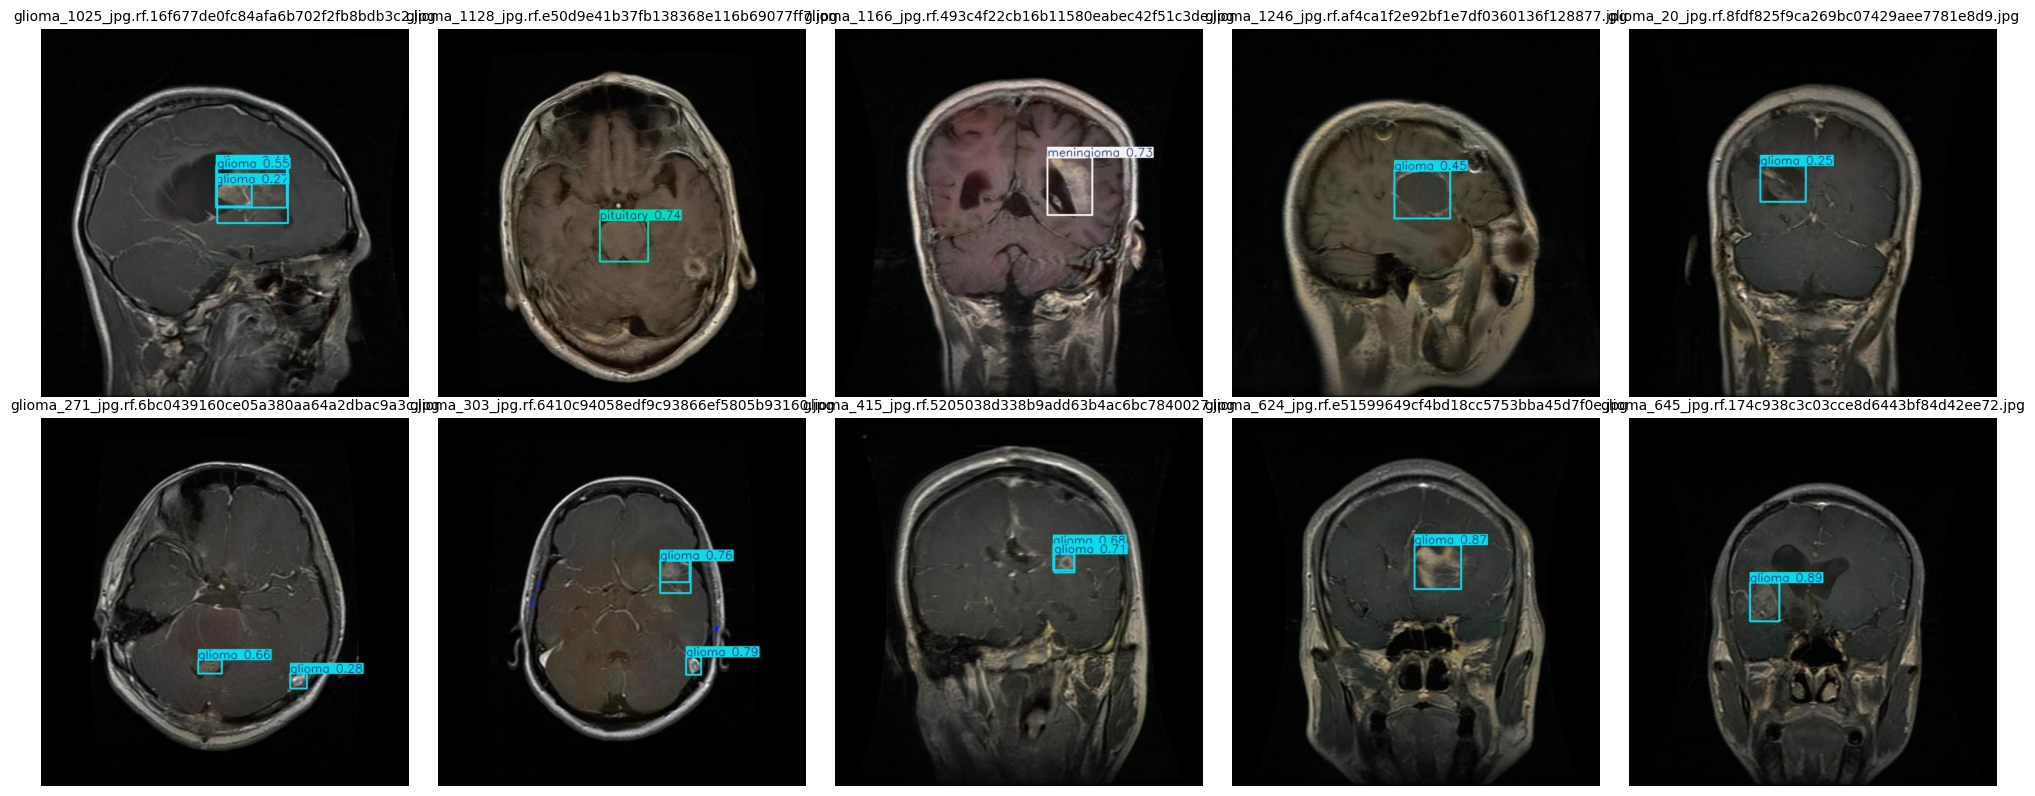

In [16]:
# Path to the predictions folder
pred_dir = "/content/runs/detect/predict"

# Getting the first 10 image filenames (sorted alphabetically)
imgs = sorted([f for f in os.listdir(pred_dir) if f.lower().endswith(('.png','.jpg','.jpeg'))])[:10]

# Setting up the figure: 2 rows × 5 cols
plt.figure(figsize=(20, 8))
for i, img_name in enumerate(imgs):
    img = Image.open(os.path.join(pred_dir, img_name))
    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.title(img_name, fontsize=10)
    plt.axis('off')
plt.tight_layout()
plt.show()

Then, I randomly selected 10 images from the newly predicted images and displayed them on the screen.

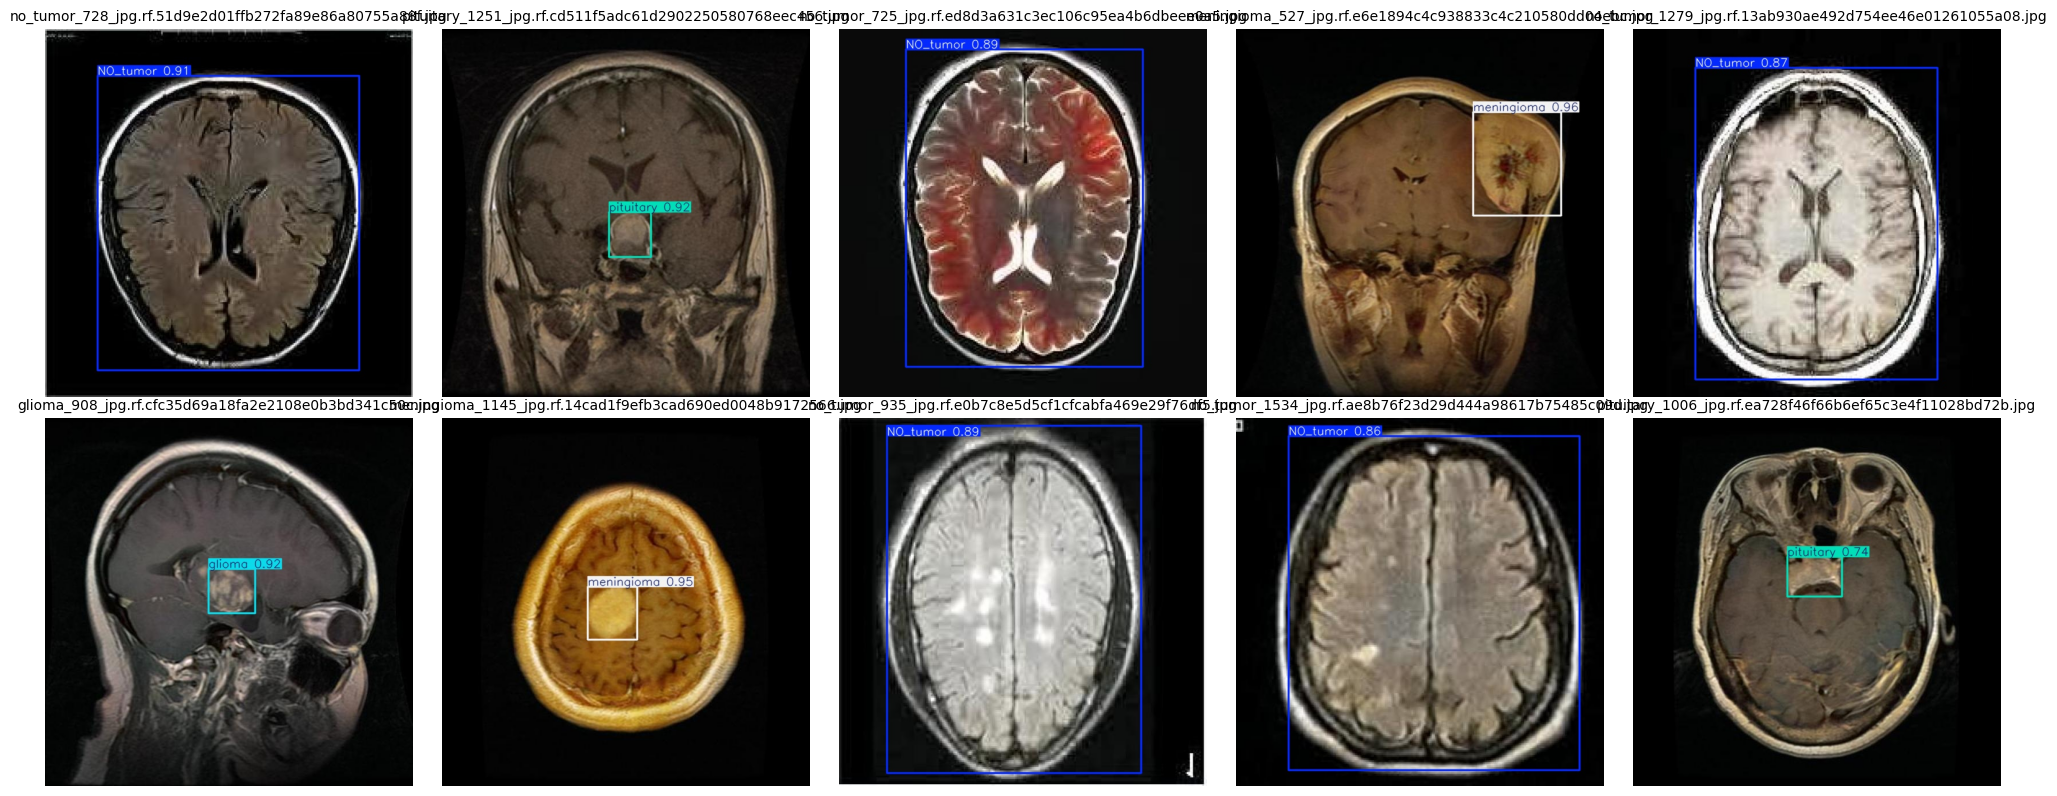

In [17]:
# Path to the predictions folder
pred_dir = "/content/runs/detect/predict"

# Getting filenames of all images and filtering by extension
all_imgs = [f for f in os.listdir(pred_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Randomly sampling 10 images
imgs = random.sample(all_imgs, k=min(10, len(all_imgs)))

# Setting up figure: 2 rows × 5 columns
plt.figure(figsize=(20, 8))
for i, img_name in enumerate(imgs):
    img = Image.open(os.path.join(pred_dir, img_name))
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(img_name, fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

### **Segmentation**

To perform segmentation using SAM2 model, we are going to need the coordinates of the bounding boxes that are generated using the YOLLO11 model.

These coordinates will be given to the SAM2 model as an input.

So before we are going to perform segmentation, we are going to fetch these bounding box coordinates using the following code cell.

In [18]:
# Loading the model
model = YOLO("runs/detect/train/weights/best.pt")  # pretrained YOLO11n model

# Running batched inference on a list of images
results = model("/content/Tumor_Dataset/test/images")  # return a list of Results objects

# Processing results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    print(boxes)


image 1/191 /content/Tumor_Dataset/test/images/glioma_1025_jpg.rf.16f677de0fc84afa6b702f2fb8bdb3c2.jpg: 640x640 3 gliomas, 11.3ms
image 2/191 /content/Tumor_Dataset/test/images/glioma_1128_jpg.rf.e50d9e41b37fb138368e116b69077ff7.jpg: 640x640 1 pituitary, 9.2ms
image 3/191 /content/Tumor_Dataset/test/images/glioma_1166_jpg.rf.493c4f22cb16b11580eabec42f51c3de.jpg: 640x640 1 meningioma, 9.4ms
image 4/191 /content/Tumor_Dataset/test/images/glioma_1246_jpg.rf.af4ca1f2e92bf1e7df0360136f128877.jpg: 640x640 1 glioma, 9.3ms
image 5/191 /content/Tumor_Dataset/test/images/glioma_20_jpg.rf.8fdf825f9ca269bc07429aee7781e8d9.jpg: 640x640 1 glioma, 11.6ms
image 6/191 /content/Tumor_Dataset/test/images/glioma_271_jpg.rf.6bc0439160ce05a380aa64a2dbac9a3c.jpg: 640x640 2 gliomas, 10.0ms
image 7/191 /content/Tumor_Dataset/test/images/glioma_303_jpg.rf.6410c94058edf9c93866ef5805b93160.jpg: 640x640 3 gliomas, 9.0ms
image 8/191 /content/Tumor_Dataset/test/images/glioma_415_jpg.rf.5205038d338b9add63b4ac6bc7840

The code cell generate the following types of coordinates for each image:

1.   xywh
1.   xywhn
3.   xyxy
4.   xyxyn

But I only need xyxy coordinates so, I'm going to fetch those coordinates and give them as an input to the SAM2 model.

In the following code cell, I loaded the SAM2 model to perform segmentation on the test images.

In [34]:
# Loading the YOLO model
yolo_model = YOLO("runs/detect/train/weights/best.pt")  # pretrained YOLO model

# Running batched inference on a list of images
results = yolo_model("/content/Tumor_Dataset/test/images")  # return a list of Results objects

# Loading the SAM model
sam_model = SAM("sam2_b.pt")

for result in results:
     class_ids = result.boxes.cls.int().tolist()  # noqa
     if len(class_ids):
         boxes = result.boxes.xyxy  # Boxes object for bbox outputs
         sam_results = sam_model(result.orig_img, bboxes=boxes, verbose=False, save=True, device=0)


image 1/191 /content/Tumor_Dataset/test/images/glioma_1025_jpg.rf.16f677de0fc84afa6b702f2fb8bdb3c2.jpg: 640x640 3 gliomas, 10.5ms
image 2/191 /content/Tumor_Dataset/test/images/glioma_1128_jpg.rf.e50d9e41b37fb138368e116b69077ff7.jpg: 640x640 1 pituitary, 8.9ms
image 3/191 /content/Tumor_Dataset/test/images/glioma_1166_jpg.rf.493c4f22cb16b11580eabec42f51c3de.jpg: 640x640 1 meningioma, 8.8ms
image 4/191 /content/Tumor_Dataset/test/images/glioma_1246_jpg.rf.af4ca1f2e92bf1e7df0360136f128877.jpg: 640x640 1 glioma, 8.5ms
image 5/191 /content/Tumor_Dataset/test/images/glioma_20_jpg.rf.8fdf825f9ca269bc07429aee7781e8d9.jpg: 640x640 1 glioma, 8.5ms
image 6/191 /content/Tumor_Dataset/test/images/glioma_271_jpg.rf.6bc0439160ce05a380aa64a2dbac9a3c.jpg: 640x640 2 gliomas, 8.4ms
image 7/191 /content/Tumor_Dataset/test/images/glioma_303_jpg.rf.6410c94058edf9c93866ef5805b93160.jpg: 640x640 3 gliomas, 9.6ms
image 8/191 /content/Tumor_Dataset/test/images/glioma_415_jpg.rf.5205038d338b9add63b4ac6bc784002